# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [1]:
import pandas as pd
import numpy as np

#Read files:
data = pd.read_csv("data_data_prep_exercise.csv", delimiter=',')

In [2]:
data.shape

(8523, 14)

In [3]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_missing_ind        int64
Outlet_Size_missing_ind        int64
dtype: object

In [4]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Outlet_Size_missing_ind
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,0,1
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0,0
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,0,0
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1,0
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986,0,1
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350,0,1


In [5]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Outlet_Size_missing_ind
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252,0,0
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Unknown,Tier 2,Supermarket Type1,468.7232,0,1
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880,0,0
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820,0,0
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360,0,0
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850,0,1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,0
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,0,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_missing_ind      0
Outlet_Size_missing_ind      0
dtype: int64

## 4. Feature Engineering

1. Resolving the issues in the data to make it ready for the analysis.
2. Create some new variables using the existing ones.





### Create a broad category of Type of Item

Item_Type variable has many categories which might prove to be very useful in analysis. Look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. Use the Item_Identifier variable to create a new column

In [8]:
data["Item_Identifier_Category"] = data["Item_Identifier"].str[:2]

In [9]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Outlet_Size_missing_ind,Item_Identifier_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,0,1,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,NC


In [10]:
data['Item_Identifier_Category'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier_Category, dtype: int64

(-0.5, 2.5, 0.0, 13500.0)

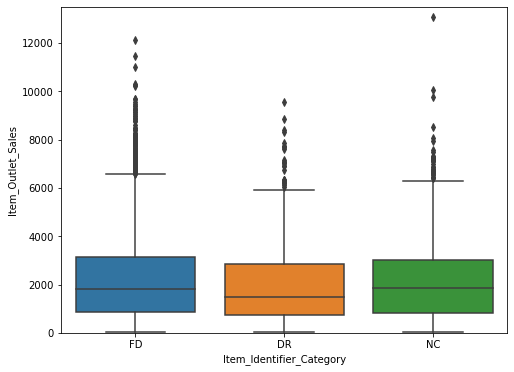

In [11]:
# Item_Identifier_Category
var = 'Item_Identifier_Category'
data_iic = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_iic)
fig.axis(ymin=0, ymax=13500)

In [12]:
data.groupby(["Item_Identifier_Category", "Item_Type"]).size()

Item_Identifier_Category  Item_Type            
DR                        Dairy                     140
                          Hard Drinks               214
                          Soft Drinks               445
FD                        Baking Goods              648
                          Breads                    251
                          Breakfast                 110
                          Canned                    649
                          Dairy                     542
                          Frozen Foods              856
                          Fruits and Vegetables    1232
                          Meat                      425
                          Seafood                    64
                          Snack Foods              1200
                          Starchy Foods             148
NC                        Health and Hygiene        520
                          Household                 910
                          Others                    169


### Determine the years of operation of a store

Make a new column depicting the years of operation of a store (i.e. how long the store exists). 

In [13]:
data["Outlet_Operating_Year"] = 2020 - data["Outlet_Establishment_Year"] 

In [14]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Outlet_Size_missing_ind,Item_Identifier_Category,Outlet_Operating_Year
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0,FD,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0,DR,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0,FD,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,0,1,FD,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,NC,33
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0,0,FD,11
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,0,0,FD,33
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1,0,FD,35
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986,0,1,FD,18
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350,0,1,FD,13


In [15]:
data['Outlet_Operating_Year'].value_counts()

35    1463
33     932
23     930
21     930
16     930
18     929
11     928
13     926
22     555
Name: Outlet_Operating_Year, dtype: int64

(-0.5, 8.5, 0.0, 13500.0)

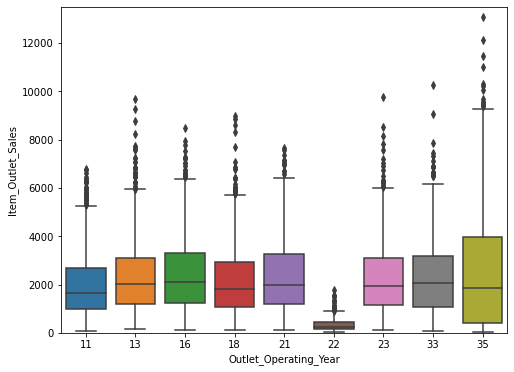

In [16]:
# Outlet_Operating_Year
var = 'Outlet_Operating_Year'
data_ooy = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_ooy)
fig.axis(ymin=0, ymax=13500)

### Modify categories of Item_Fat_Content

There are difference in representation in categories of Item_Fat_Content variable. This should be corrected.

In [17]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
data.replace(
    {'Item_Fat_Content': 
     {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [19]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

(-0.5, 1.5, 0.0, 13500.0)

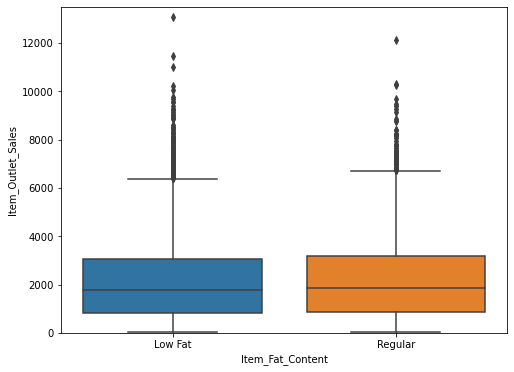

In [20]:
# Item_Fat_Content
var = 'Item_Fat_Content'
data_ifc = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_ifc)
fig.axis(ymin=0, ymax=13500)

There are some non-consumables as well and a fat-content should not be specified for them. Create a separate category for such kind of observations.

In [21]:
data.groupby(["Item_Identifier_Category", "Item_Fat_Content"]).size()

Item_Identifier_Category  Item_Fat_Content
DR                        Low Fat              728
                          Regular               71
FD                        Low Fat             3190
                          Regular             2935
NC                        Low Fat             1599
dtype: int64

In [22]:
mask_NC = (data["Item_Identifier_Category"] == "NC")
data.loc[mask_NC, "Item_Fat_Content"] = "None"

In [23]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Outlet_Size_missing_ind,Item_Identifier_Category,Outlet_Operating_Year
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0,FD,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0,DR,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0,FD,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,0,1,FD,22
4,NCD19,8.930,None,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,NC,33
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0,0,FD,11
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,0,0,FD,33
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1,0,FD,35
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986,0,1,FD,18
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350,0,1,FD,13


In [24]:
data['Item_Fat_Content'].value_counts()

Low Fat    3918
Regular    3006
None       1599
Name: Item_Fat_Content, dtype: int64

(-0.5, 2.5, 0.0, 13500.0)

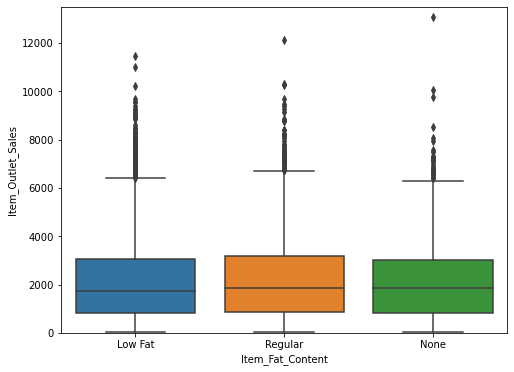

In [25]:
# Item_Fat_Content
var = 'Item_Fat_Content'
data_ifc = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_ifc)
fig.axis(ymin=0, ymax=13500)

### Numerical and One-Hot Encoding of Categorical variables

Since scikit-learn algorithms accept only numerical variables, we need to convert all categorical variables into numeric types. 

- if the variable is Ordinal we can simply map its values into numbers
- if the variable is Nominal (we cannot sort the values) we need to One-Hot Encode them --> create dummy variables

In [26]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_missing_ind        int64
Outlet_Size_missing_ind        int64
Item_Identifier_Category      object
Outlet_Operating_Year          int64
dtype: object

In [27]:
data.groupby("Outlet_Location_Type")['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

In [28]:
data.groupby(["Outlet_Location_Type", "Outlet_Identifier"])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT019               1.796941e+05
                      OUT046               2.118395e+06
                      OUT049               2.183970e+06
Tier 2                OUT017               2.167465e+06
                      OUT035               2.268123e+06
                      OUT045               2.036725e+06
Tier 3                OUT010               1.883402e+05
                      OUT013               2.142664e+06
                      OUT018               1.851823e+06
                      OUT027               3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [29]:
# lets map ORDINAL features

data.replace({'Item_Fat_Content': {'None': 0, 'Low Fat': 1, 'Regular': 2},
             'Outlet_Size': {'Unknown': 0, 'Small': 1, 'Medium': 2, 'High': 3}, 
             'Outlet_Location_Type': {'Tier 3': 1, 'Tier 2': 2, 'Tier 1': 3}}, 
             inplace=True)

In [30]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Outlet_Size_missing_ind,Item_Identifier_Category,Outlet_Operating_Year
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2,3,Supermarket Type1,3735.1380,0,0,FD,21
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2,1,Supermarket Type2,443.4228,0,0,DR,11
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2,3,Supermarket Type1,2097.2700,0,0,FD,21
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,1,Grocery Store,732.3800,0,1,FD,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,3,1,Supermarket Type1,994.7052,0,0,NC,33


In [31]:
cat_feats = data.dtypes[data.dtypes == 'object'].index.tolist()
cat_feats

['Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Type',
 'Item_Identifier_Category']

In [32]:
data.groupby("Outlet_Type")['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [33]:
data.groupby(["Outlet_Type", "Outlet_Identifier"])['Item_Outlet_Sales'].sum()

Outlet_Type        Outlet_Identifier
Grocery Store      OUT010               1.883402e+05
                   OUT019               1.796941e+05
Supermarket Type1  OUT013               2.142664e+06
                   OUT017               2.167465e+06
                   OUT035               2.268123e+06
                   OUT045               2.036725e+06
                   OUT046               2.118395e+06
                   OUT049               2.183970e+06
Supermarket Type2  OUT018               1.851823e+06
Supermarket Type3  OUT027               3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [34]:
# Creating a copy of the dataframe to alter by one-hot encoding.

data2 = data.copy()

In [35]:
data2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_missing_ind        int64
Outlet_Size_missing_ind        int64
Item_Identifier_Category      object
Outlet_Operating_Year          int64
dtype: object

In [36]:
data2.shape

(8523, 16)

We will remove the Item_Identifier variable.  The reasoning is explained in grid_search_exercise.ipynb.

In [37]:
data2.drop("Item_Identifier", axis=1, inplace=True)
data2.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_missing_ind        int64
Outlet_Size_missing_ind        int64
Item_Identifier_Category      object
Outlet_Operating_Year          int64
dtype: object

In [38]:
cat_feats2 = data2.dtypes[data2.dtypes == 'object'].index.tolist()
cat_feats2

['Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Item_Identifier_Category']

Now, we will one-hot encode the categorical variables.

In [39]:
data2_dummy = pd.get_dummies(data2[cat_feats2])
data2_dummy.head()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Category_DR,Item_Identifier_Category_FD,Item_Identifier_Category_NC
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [40]:
data2.drop(cat_feats2, axis=1, inplace=True)
data2.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Item_Outlet_Sales            float64
Item_Weight_missing_ind        int64
Outlet_Size_missing_ind        int64
Outlet_Operating_Year          int64
dtype: object

In [41]:
print(data2.shape)
print(data2_dummy.shape)

(8523, 11)
(8523, 33)


In [42]:
data3 = pd.concat([data2, data2_dummy], axis=1)
data3.shape

(8523, 44)

In [43]:
data3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Outlet_Size_missing_ind,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Category_DR,Item_Identifier_Category_FD,Item_Identifier_Category_NC
0,9.30,1,0.016047,249.8092,1999,2,3,3735.1380,0,0,...,0,0,1,0,1,0,0,0,1,0
1,5.92,2,0.019278,48.2692,2009,2,1,443.4228,0,0,...,0,0,0,0,0,1,0,1,0,0
2,17.50,1,0.016760,141.6180,1999,2,3,2097.2700,0,0,...,0,0,1,0,1,0,0,0,1,0
3,19.20,2,0.000000,182.0950,1998,0,1,732.3800,0,1,...,0,0,0,1,0,0,0,0,1,0
4,8.93,0,0.000000,53.8614,1987,3,1,994.7052,0,0,...,0,0,0,0,1,0,0,0,0,1


In [44]:
data3.dtypes.head(12)

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Item_Outlet_Sales            float64
Item_Weight_missing_ind        int64
Outlet_Size_missing_ind        int64
Outlet_Operating_Year          int64
Item_Type_Baking Goods         uint8
dtype: object

In [45]:
cat_feats3 = data3.dtypes[data3.dtypes == 'object'].index.tolist()
cat_feats3

[]

All variables should be by now numeric

### Exporting Data
you can save the processed data to disk

In [46]:
data3.to_csv('data_feature_engineering_exercise.csv', index=False)